In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=torch.linspace(0,799,800)

In [3]:
y=torch.sin(x*2*3.1416/40)

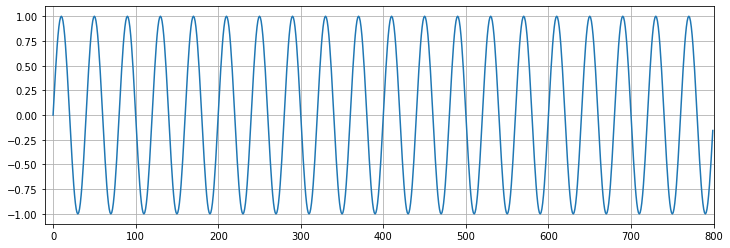

In [4]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

In [5]:
test_size=40
train_set=y[:-test_size]
test_set=y[-test_size:]

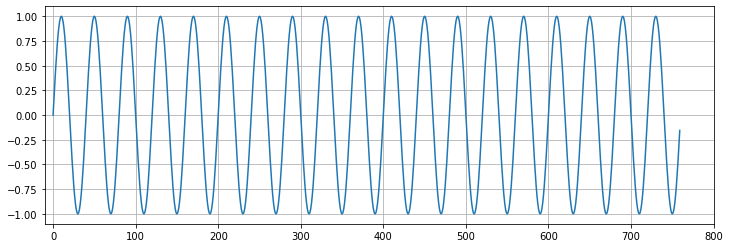

In [6]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())

In [7]:
def input_data(seq,ws):
    out=[]
    L=len(seq)
    for i in range(L-ws):
        window=seq[i:i+ws]
        label=seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [8]:
window_size=40
train_data=input_data(train_set,window_size)

In [9]:
len(train_data)

720

In [10]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [11]:
class LSTM(nn.Module):
    def __init__(self,input_size=1,hidden_size=50,out_size=1):
        super().__init__()
        self.hidden_size=hidden_size
        self.lstm=nn.LSTM(input_size,hidden_size)
        self.linear=nn.Linear(hidden_size,out_size)
        self.hidden=(torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    def forward(self,seq):
        lstm_out,self.hidden=self.lstm(seq.view(len(seq),1,-1),self.hidden)
        pred=self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [12]:
torch.manual_seed(42)
model=LSTM()
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=.01)

In [13]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [14]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


Epoch: 0, Loss: 0.09212874621152878
Performance on test range: 0.6071590185165405


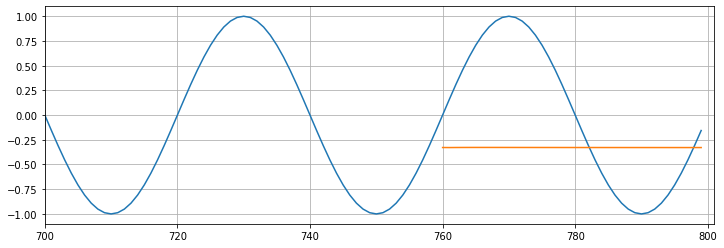

Epoch: 1, Loss: 0.06506767123937607
Performance on test range: 0.565098762512207


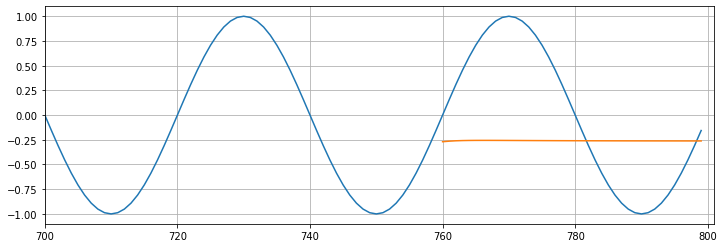

Epoch: 2, Loss: 0.04198046773672104
Performance on test range: 0.5199716687202454


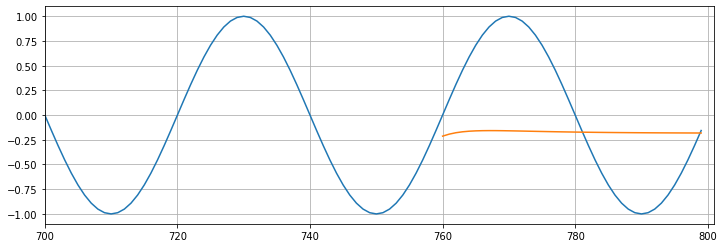

Epoch: 3, Loss: 0.01784275658428669
Performance on test range: 0.42209967970848083


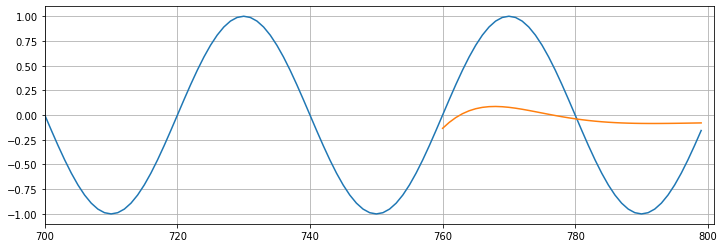

Epoch: 4, Loss: 0.0028870997484773397
Performance on test range: 0.16624116897583008


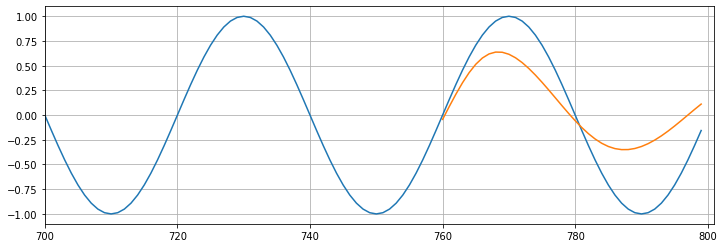

Epoch: 5, Loss: 0.0003200757782906294
Performance on test range: 0.03055439703166485


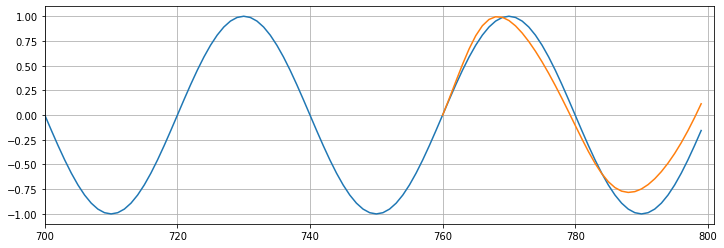

Epoch: 6, Loss: 0.00012969104864168912
Performance on test range: 0.014990181662142277


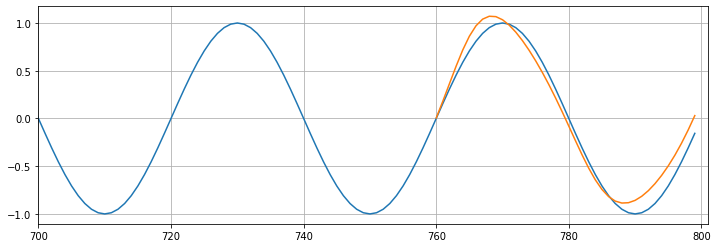

Epoch: 7, Loss: 0.00012006733595626429
Performance on test range: 0.011856676079332829


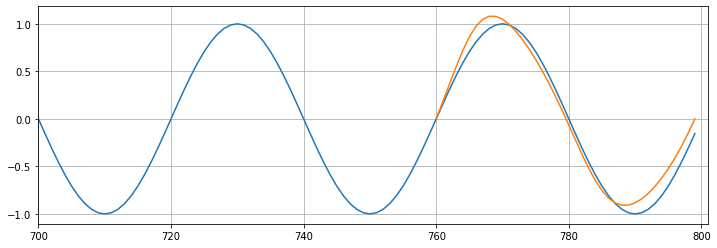

Epoch: 8, Loss: 0.0001265565661014989
Performance on test range: 0.010163827799260616


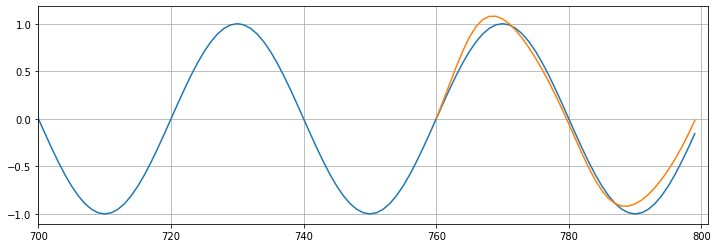

Epoch: 9, Loss: 0.00013195407518651336
Performance on test range: 0.00889757089316845


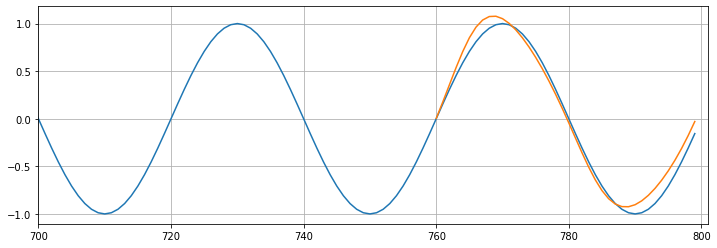

In [16]:
epochs=10
future=40

for i in range(epochs):
    for seq,y_train in train_data:
        optimizer.zero_grad()
        model.hidden=(torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        y_pred=model(seq)
        loss=criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
    print(f'Epoch: {i}, Loss: {loss.item()}')
    preds=train_set[-window_size:].tolist()
    for f in range(future):
        seq=torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden=(torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
    loss=criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Performance on test range: {loss}')
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

In [17]:
epochs=15
window_size=40
future=40
all_data=input_data(y,window_size)
len(all_data)

760

In [18]:
import time

In [19]:
start_time=time.time()
for i in range(epochs):
    for seq,y_train in all_data:
        optimizer.zero_grad()
        model.hidden=(torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        y_pred=model(seq)
        loss=criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
total_time=time.time()-start_time

In [21]:
total_time/60

2.5763697147369387

### PREDICTING FUTURE

In [22]:
pred=y[-window_size:].tolist()
for i in range(future):
    seq=torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden=(torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

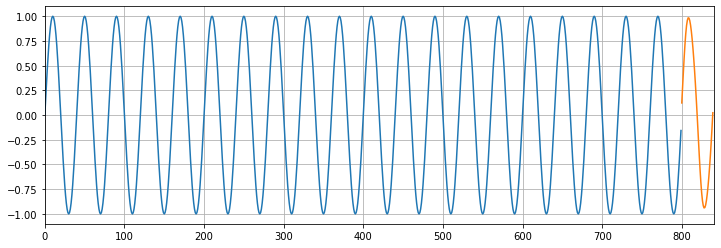

In [27]:
plt.figure(figsize=(12,4))
plt.xlim(0,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[-window_size:])
plt.show()